In [1]:
import numpy as np
from PYNQ_Car.CarOverlay.CarOverlay import CarOverlay
from PIL import Image
import IPython
overlay = CarOverlay('/usr/local/lib/python3.6/dist-packages/PYNQ_Car/Overlay/Car.bit')

In [2]:
def imshow_rgba(frame):
    image = Image.fromarray(frame)
    r, g, b, a = image.split()
    image = Image.merge('RGBA', [r,g,b,a])
    IPython.display.clear_output(1)
    display(image)
def imshow_gray(frame):
    image = Image.fromarray(frame)
    gray,_ , _ , _ = image.split()
    image = Image.merge('L', [gray])
    IPython.display.clear_output(1)
    display(image)

In [3]:
OV5640 = overlay.ov5640_driver_wrapper
video_proc = overlay.image_processing
arduino = overlay.Arduino

In [4]:
OV5640.set_rgba()

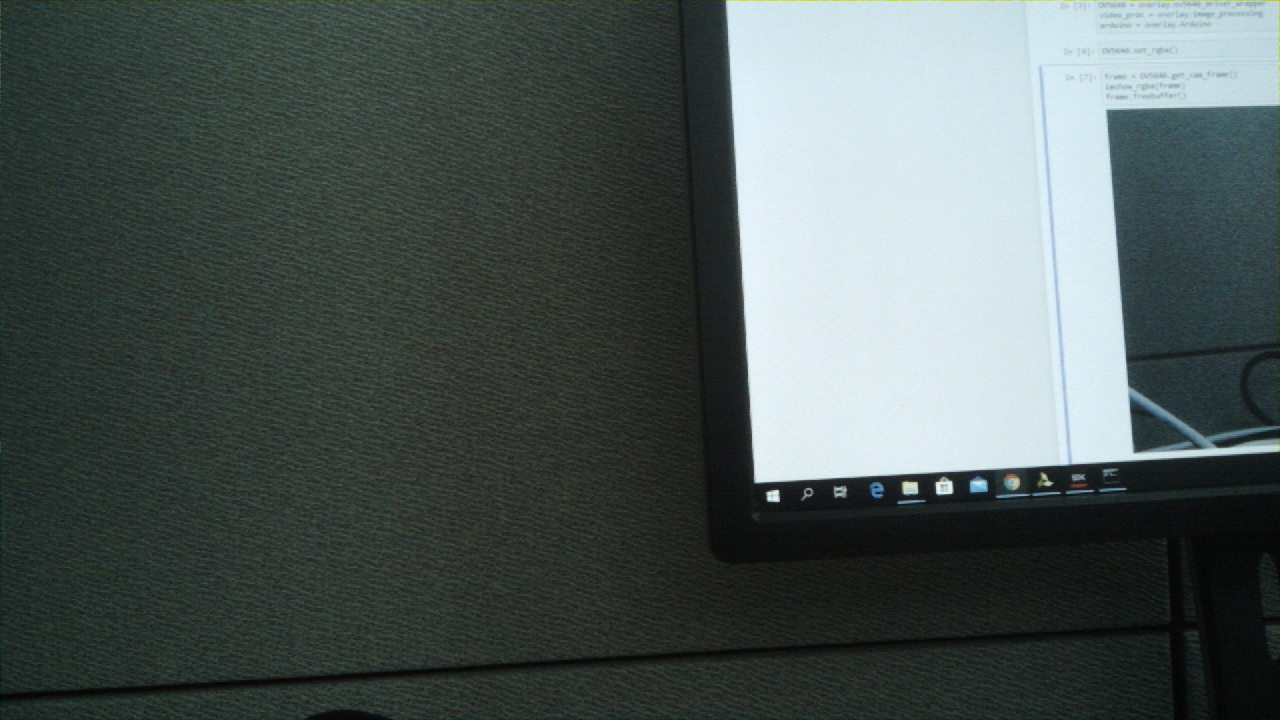

In [5]:
frame = OV5640.get_cam_frame()
imshow_rgba(frame)
frame.freebuffer()

In [6]:
OV5640.set_gray()

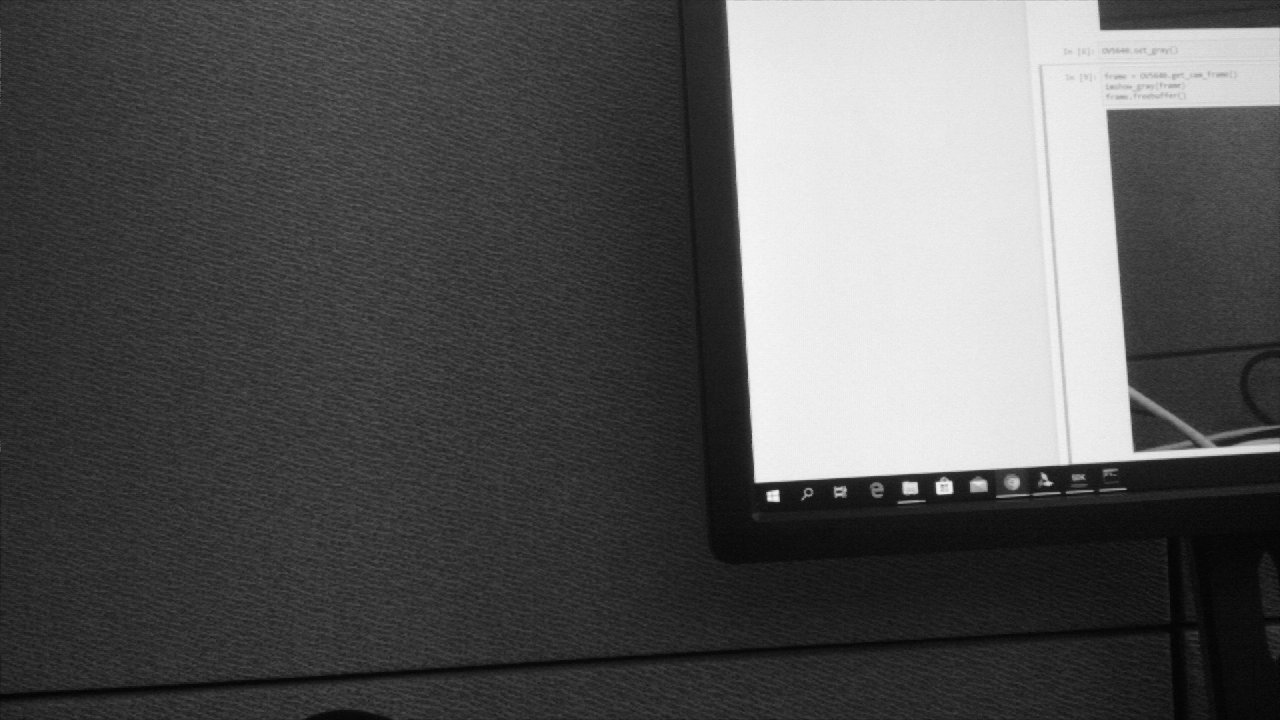

In [7]:
frame = OV5640.get_cam_frame()
imshow_gray(frame)
frame.freebuffer()

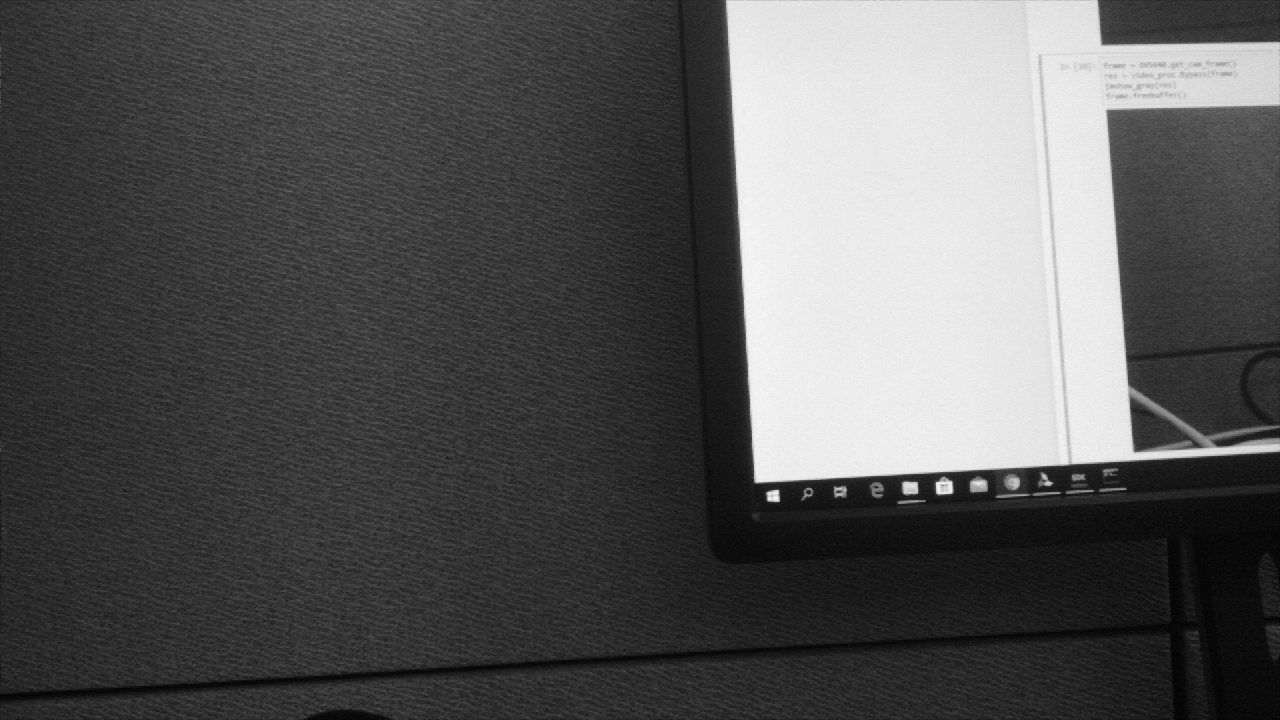

In [8]:
frame = OV5640.get_cam_frame()
res = video_proc.Bypass(frame)
imshow_gray(res)
frame.freebuffer()

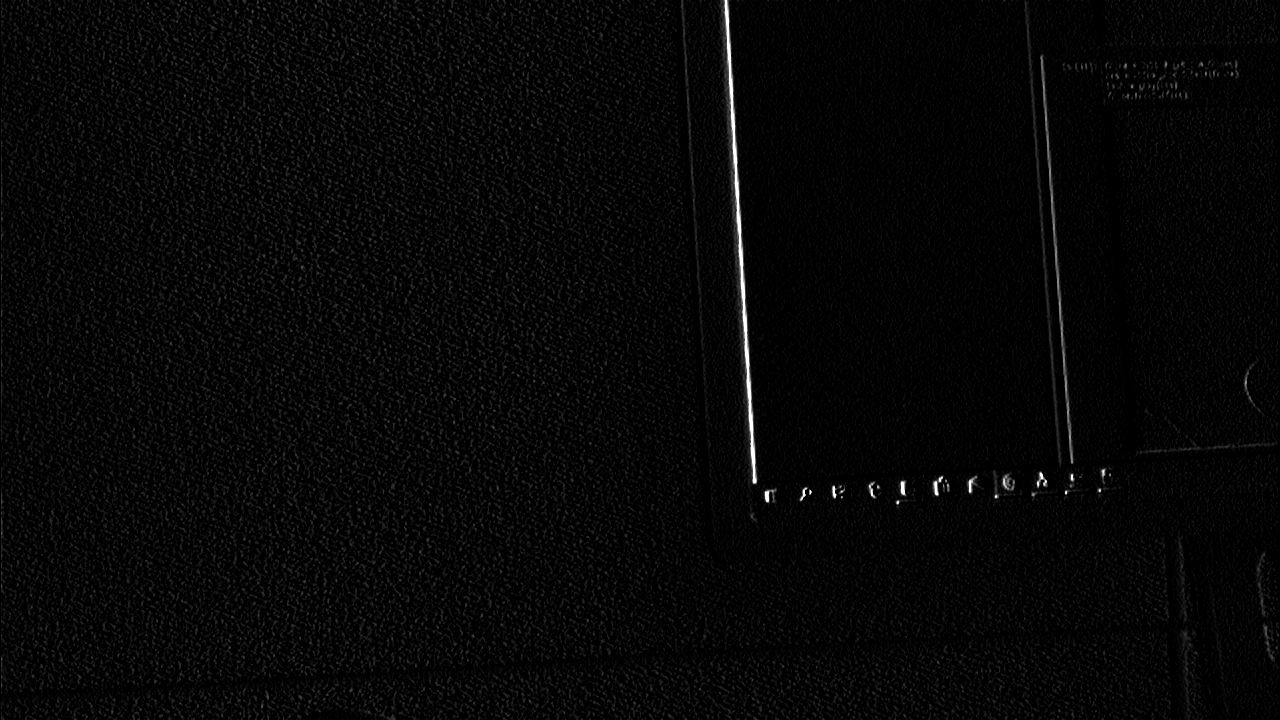

In [9]:
frame = OV5640.get_cam_frame()
res = video_proc.SobelX(frame)
imshow_gray(res)
frame.freebuffer()

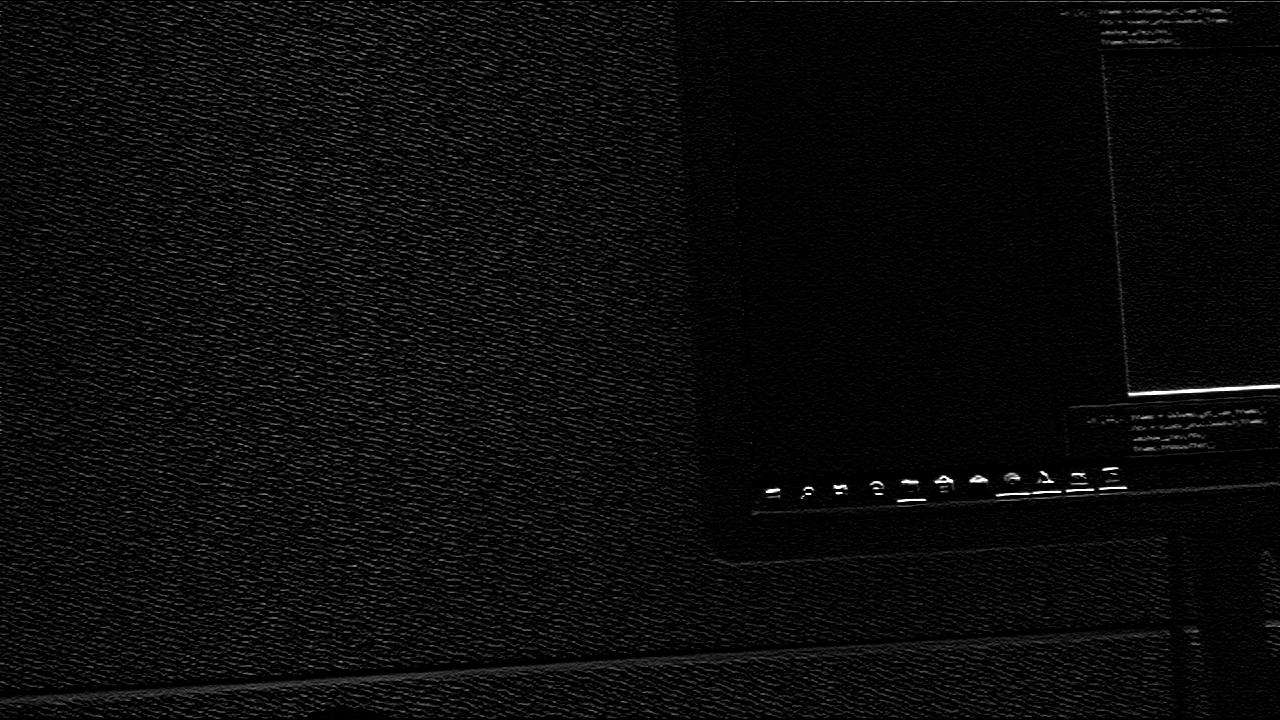

In [10]:
frame = OV5640.get_cam_frame()
res = video_proc.SobelY(frame)
imshow_gray(res)
frame.freebuffer()

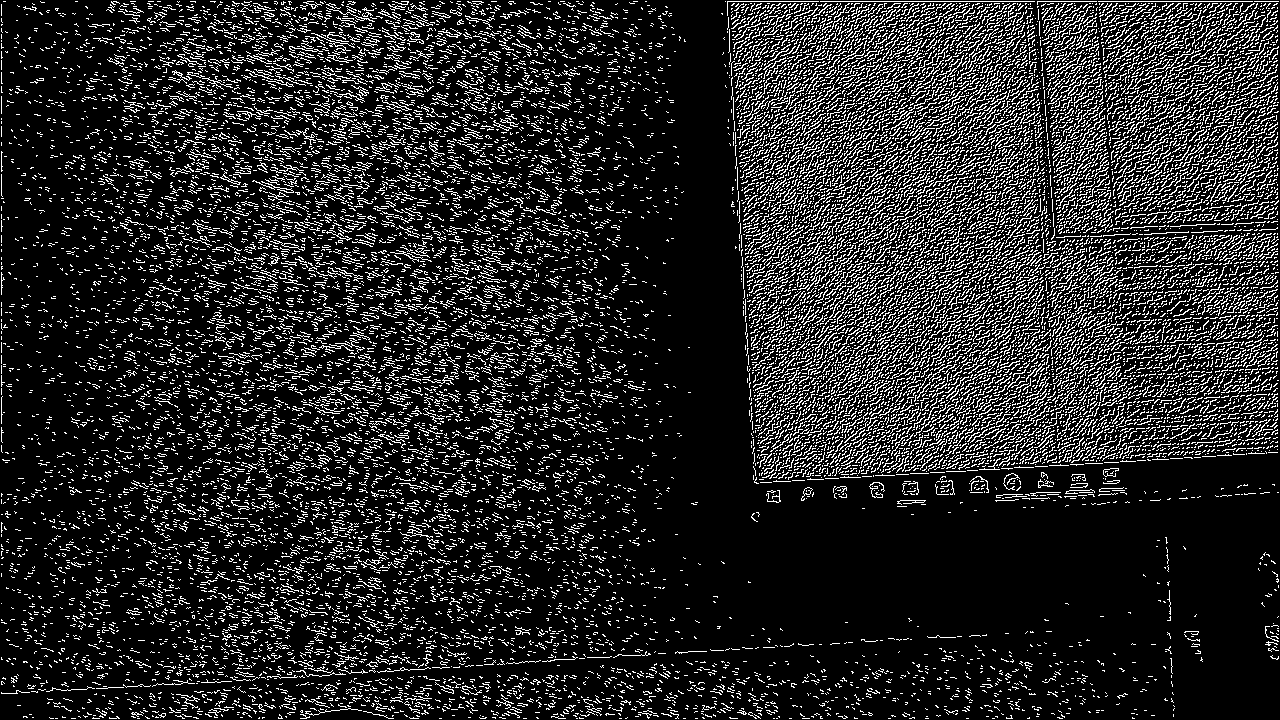

In [14]:
frame = OV5640.get_cam_frame()
res = video_proc.Canny(frame,50,80)
imshow_gray(res)
frame.freebuffer()

In [15]:
%%timeit -n 100
arduino.get_accl()

100 loops, best of 3: 3.67 ms per loop


In [16]:
%%timeit -n 100
arduino.get_gyro()

100 loops, best of 3: 3.69 ms per loop


In [17]:
%%timeit -n 100
arduino.get_compass()

100 loops, best of 3: 3.64 ms per loop


In [18]:
arduino.set_servo_pwm(240)

In [19]:
arduino.set_servo_pwm(360)

In [20]:
arduino.set_servo_pwm(300)

In [21]:
arduino.set_motor_pwm(600)

In [40]:
arduino.set_motor_pwm(0)

In [23]:
arduino.set_motor_dir_neg()

In [24]:
arduino.set_motor_pwm(600)

In [38]:
arduino.set_motor_pwm(-800)

In [35]:
arduino.get_encoder_data()

-9

In [37]:
arduino.set_encoder_dir_neg()

In [39]:
arduino.get_encoder_data()

9

In [41]:
OV5640.stop()
video_proc.stop()